Focus on affine transformations, homogeneous coordinates and composition of linear transformations.

## Afine transformations

We saw with linear transformations how we can scale, shear, reflect or rotate matrices with a single matrix, and how we can chain these linear transformation matrices into a single one, essentially applying multiple transformations (e.g. rotate and scale) with a single matrix multiplication. The linear transformations follows the form $Ax = y$ but does not allow for a translation, i.e. moving the data points. We can do this with affine transformations by adding a single component to the format of linear transformations: $Ax + b = y$. Here, the $b$ is the translation component and indicates that we are working with an affine transformation.

Affine models are used in machine learning for data preprocessing. Imagine a dataset with pictures of plant leaves, where we want a preprocess that ensures all pictures are rotated to have the leaf stem at the top of the picture, translated the data to be centered and then scaled to have the leaf take up the same size (e.g., represented by 16 x 16 pixels or as close as possible). The middle step, the data translation, cannot directly be part of the remaining linear transformation chain by chaining these matrix multiplications, since the translation will not be done using a matrix but instead a vector. This is where homogenous coordinates come in.

### Homogenous coordinates

Imagine a 2-d data point but with an added 3rd component with a value of 1 $p = \begin{bmatrix} 4 \\ 8 \\ 1 \end{bmatrix}$. We now can apply transformations but to transform a $3 \times 1$ data point we require a $k \times 3$ transformation model, where we would normally be usin a $2 \times 2$ model. To ensure that we can chain them together, lets make it a square $3 \times 3$ transformation model. Lets use the rotation transformation matrix to illustrate this with 0 components for the new row and column except for the very last component:

$T_R =
\begin{bmatrix} 
    \cos{\theta} & - \sin{\theta} & a \\ 
    \sin{\theta} & \cos{\theta} & b \\
    0 & 0 & 1 \\
\end{bmatrix}
$

Now we can multiply the above $3 \times 3$ matrix with our sample 2-d point $p$ with a homogenous coordinate:

$T_R =
\begin{bmatrix} 
    \cos{\theta} & - \sin{\theta} & a \\ 
    \sin{\theta} & \cos{\theta} & b \\
    0 & 0 & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix} 4 \\ 8 \\ 1 \end{bmatrix}
= \begin{bmatrix}
    \cos{\theta} * 4 - \sin{\theta} * 8 + a * 1 \\
    \sin{\theta} * 4 + \cos{\theta} * 8 + b * 1 \\
    0 * 4 + 0 * 8 + 1 * 1 \\
\end{bmatrix}$

Notice how the rotation is added first and then the translating component $a * 1$ for the x-coordinate and $b * 1$ for the y-coordinate, and lastly the homogenous coordinate stays 1.  

In other words, multiple of these transformations will keep the homogenous coordinate constant but applying a translating constant factor. In the below example, we sdfasdf

## Afine transformations

We saw with linear transformations how we can scale, shear, reflect or rotate matrices with a single matrix, and how we can chain these linear transformation matrices into a single one, essentially applying multiple transformations (e.g. rotate and scale) with a single matrix multiplication. The linear transformations follows the form $Ax = y$ but does not allow for a translation, i.e. moving the data points. We can do this with affine transformations by adding a single component to the format of linear transformations: $Ax + b = y$. Here, the $b$ is the translation component and indicates that we are working with an affine transformation.

Affine models are used in machine learning for data preprocessing. Imagine a dataset with pictures of plant leaves, where we want a preprocess that ensures all pictures are rotated to have the leaf stem at the top of the picture, translated the data to be centered and then scaled to have the leaf take up the same size (e.g., represented by 16 x 16 pixels or as close as possible). The middle step, the data translation, cannot directly be part of the remaining linear transformation chain by chaining these matrix multiplications, since the translation will not be done using a matrix but instead a vector. This is where homogenous coordinates come in.

### Homogenous coordinates

Imagine a 2-d data point but with an added 3rd component with a value of 1 $p = \begin{bmatrix} 4 \\ 8 \\ 1 \end{bmatrix}$. We now can apply transformations but to transform a $3 \times 1$ data point we require a $k \times 3$ transformation model, where we would normally be usin a $2 \times 2$ model. To ensure that we can chain them together, lets make it a square $3 \times 3$ transformation model. Lets use the rotation transformation matrix to illustrate this with 0 components for the new row and column except for the very last component:

$T_R =
\begin{bmatrix} 
    \cos{\theta} & - \sin{\theta} & a \\ 
    \sin{\theta} & \cos{\theta} & b \\
    0 & 0 & 1 \\
\end{bmatrix}
$

Now we can multiply the above $3 \times 3$ matrix with our sample 2-d point $p$ with a homogenous coordinate:

$T_R =
\begin{bmatrix} 
    \cos{\theta} & - \sin{\theta} & a \\ 
    \sin{\theta} & \cos{\theta} & b \\
    0 & 0 & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix} 4 \\ 8 \\ 1 \end{bmatrix}
= \begin{bmatrix}
    \cos{\theta} * 4 - \sin{\theta} * 8 + a * 1 \\
    \sin{\theta} * 4 + \cos{\theta} * 8 + b * 1 \\
    0 * 4 + 0 * 8 + 1 * 1 \\
\end{bmatrix}$

Notice how the rotation is added first and then the translating component $a * 1$ for the x-coordinate and $b * 1$ for the y-coordinate, and lastly the homogenous coordinate stays 1.  

In other words, multiple of these transformations will keep the homogenous coordinate constant but applying a translating constant factor. In the below example, we convert a square shape in a 2-d space to first be rotated by 45 degrees to be aligned with the axes, translated such that a point is in the origin and lastly scaled to have side lengths of 2. The translation happens in the same transformation matrix as the rotation and this is why we can chain them together to one matrix multiplication for $T \cdot A$.

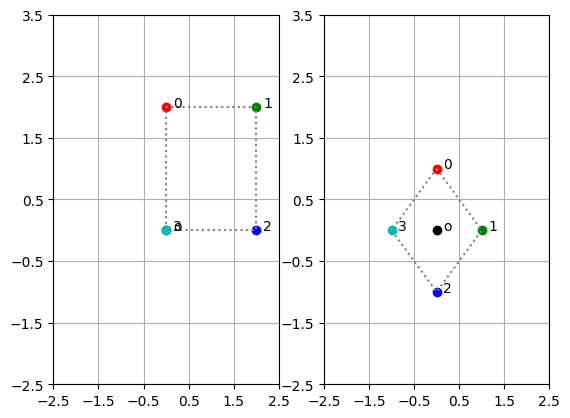

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

"""Copy pasta from tutorial on iml.itu.dk"""
def plot_points(points, t_points, origin=(0, 0)):
    """
    Displays the points and t_points in separate subplots and where the points with the same index have the same color
    
    Args:
        points: matrix of 2D points.
        t_points: matrix of transformed 2D points.
        origin: it is simply show the origin and is (0,0) by default.
    """
    color_lut = 'rgbcmy'
    fig, (ax1, ax2) = plt.subplots(1, 2)
    xs_t = []
    ys_t = []
    xs = []
    ys = []
    i = 0

    text_offset = 0.15
    ax1.scatter(origin[0], origin[1], color='k')
    ax1.text(origin[0] + text_offset, origin[1], "o")
    ax2.scatter(origin[0], origin[1], color='k')
    ax2.text(origin[0] + text_offset, origin[1], "o")

    for row, t_row in zip(points.T, t_points.T):
        x_s, y_s = row
        x_s_t, y_s_t = t_row
        xs.append(x_s)
        ys.append(y_s)
        xs_t.append(x_s_t)
        ys_t.append(y_s_t)
        c_s = color_lut[i]  # these are the same but, its good to be explicit
        ax1.scatter(x_s, y_s, color=c_s)
        ax1.text(x_s + text_offset, y_s, str(i))
        ax2.scatter(x_s_t, y_s_t, color=c_s)
        ax2.text(x_s_t + text_offset, y_s_t, str(i))
        i += 1
    xs.append(xs[0])
    ys.append(ys[0])
    xs_t.append(xs_t[0])
    ys_t.append(ys_t[0])
    ax1.plot(xs, ys, color="gray", linestyle='dotted')
    ax1.set_xticks(np.arange(-2.5, 3, 1))
    ax1.set_yticks(np.arange(-2.5, 4, 1))
    ax2.plot(xs_t, ys_t, color="gray", linestyle='dotted')
    ax2.set_xticks(np.arange(-2.5, 3, 1))
    ax2.set_yticks(np.arange(-2.5, 4, 1))
    ax1.grid()
    ax2.grid()
    plt.show()

def to_homogeneous(points):
    """Transform points to homogeneous coordinates."""
    return np.vstack((points, np.ones((1, points.shape[1]))))


def to_euclidean(points):
    """Transform homogeneous points to euclidean points."""
    return points[:2] / points[2]

A = np.array([[0, 1], [1, 0], [0, -1], [-1, 0]]).T

angle = 45
theta = np.radians(angle)
T_R = np.array([[np.cos(theta), -np.sin(theta), 0.7071], [np.sin(theta), np.cos(theta), 0.7071], [0, 0, 1]]) # Rotating

T_SC = np.array([[1.4142, 0, 0], [0, 1.4142, 0], [0, 0, 1]]) # Scaling

T = T_SC @ T_R

res = to_euclidean(T @ to_homogeneous(A))

plot_points(res, A)
